In [2]:
import pandas as pd
import os

In [3]:
table1 = pd.read_csv("Table1.csv", encoding='latin1')
table2 = pd.read_csv("Table2.csv", encoding='latin1')

In [4]:
table1.head()

,formation,collapse,Society_Polity,NaturalGeoArea,quasi_polity,age
0,1748,1826,AfDurrn,Kachi Plain,False,78
1,1193,1206,AfGhurd,Kachi Plain,False,13
2,-248,-130,AfGrBct,Sogdiana,False,118
3,426,563,AfHepht,Sogdiana,False,137
4,496,531,AfHepht,Kachi Plain,False,35


In [5]:
table2.head()

,Society_Polity,State_Formation_low,State_Formation_high,formation,Adulthood_Date,Peak_Power,Collapse_low,Collapse_high,collapse,Approx_age,...,continent,lon1,Capital_2,lat2,lon2,Capital_3,lat3,lon3,violience_attractor,censored
0,Egyptian Dynasties I and II,-3100,NaN,-3100.0,NaN,NaN,-2687.0,NaN,-2687.0,413-413 years,...,Africa,31.250833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,Old Egytpian Kingdom,-2650,-2592.0,-2621.0,-2800.0,-2400.0,-2160.0,-2150.0,-2155.0,432-500 years,...,Africa,31.250833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,The Akkadian Empire (Sumer),-2334,NaN,-2334.0,-2310.0,NaN,-2154.0,-2142.0,-2148.0,180-192 years,...,Asia,NaN,Kish,32.540278,44.604722,NaN,NaN,NaN,NaN,False
3,Ur III Dynasty (Neo-Sumerian Empire),-2112,NaN,-2112.0,NaN,NaN,-2004.0,NaN,-2004.0,108-108 years,...,Asia,46.103056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,Xia Dynasty,-2070,-1850.0,-1960.0,NaN,-1800.0,-1651.0,-1600.0,-1625.5,199-470 years,...,Asia,113.025131,Yangcheng (modern Gaocheng),34.400600,113.150300,NaN,NaN,NaN,NaN,False


In [6]:
table2_sorted = table2.sort_values(by='formation')

In [7]:
bins = [table2_sorted['formation'].min(), table2_sorted['formation'].quantile(0.25), table2_sorted['formation'].quantile(0.5), table2_sorted['formation'].quantile(0.75), table2_sorted['formation'].max()]
table2_sorted['formation_bin'] = pd.cut(table2_sorted['formation'], bins=bins, include_lowest=True, labels=['Q1', 'Q2', 'Q3', 'Q4'])

In [8]:
table2_sorted.head()

,Society_Polity,State_Formation_low,State_Formation_high,formation,Adulthood_Date,Peak_Power,Collapse_low,Collapse_high,collapse,Approx_age,...,lon1,Capital_2,lat2,lon2,Capital_3,lat3,lon3,violience_attractor,censored,formation_bin
0,Egyptian Dynasties I and II,-3100,NaN,-3100.0,NaN,NaN,-2687.0,NaN,-2687.0,413-413 years,...,31.250833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Q1
1,Old Egytpian Kingdom,-2650,-2592.0,-2621.0,-2800.0,-2400.0,-2160.0,-2150.0,-2155.0,432-500 years,...,31.250833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Q1
672,Guo,0,0.0,-2600.0,0.0,0.0,0.0,0.0,-670.0,NaN,...,0.000000,NaN,0.000000,0.000000,NaN,0.0,0.0,0.0,False,Q1
2,The Akkadian Empire (Sumer),-2334,NaN,-2334.0,-2310.0,NaN,-2154.0,-2142.0,-2148.0,180-192 years,...,NaN,Kish,32.540278,44.604722,NaN,NaN,NaN,NaN,False,Q1
3,Ur III Dynasty (Neo-Sumerian Empire),-2112,NaN,-2112.0,NaN,NaN,-2004.0,NaN,-2004.0,108-108 years,...,46.103056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Q1


Text(0, 0.5, 'Age')

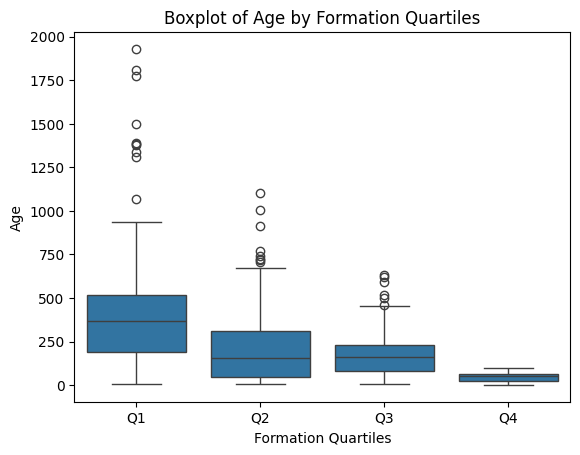

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='formation_bin', y='age', data=table2_sorted)
plt.title('Boxplot of Age by Formation Quartiles')
plt.xlabel('Formation Quartiles')
plt.ylabel('Age')

<Axes: title={'center': 'Scatter Plot of Age vs Formation'}, xlabel='formation', ylabel='age'>

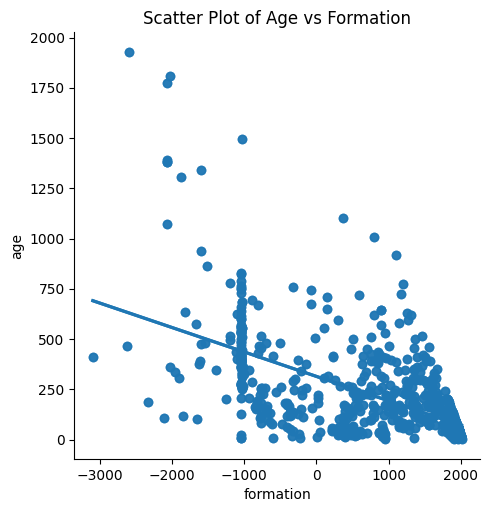

In [10]:
sns.lmplot(x='formation', y='age', data=table2_sorted, ci=None)
plt.title('Scatter Plot of Age vs Formation')
plt.xlabel('Formation')
plt.ylabel('Age')
sns.regplot(x='formation', y='age', data=table2_sorted, ci=None)

In [11]:
table2_sorted['delta'] = table2_sorted['censored'].map({True: 0, False: 1})

/opt/miniconda3/envs/tf_env/lib/python3.11/site-packages/lifelines/plotting.py:773: UserWarning: For less visual clutter, you may want to subsample to less than 25 individuals.
  warnings.warn(


Text(0.5, 0, 'Age')

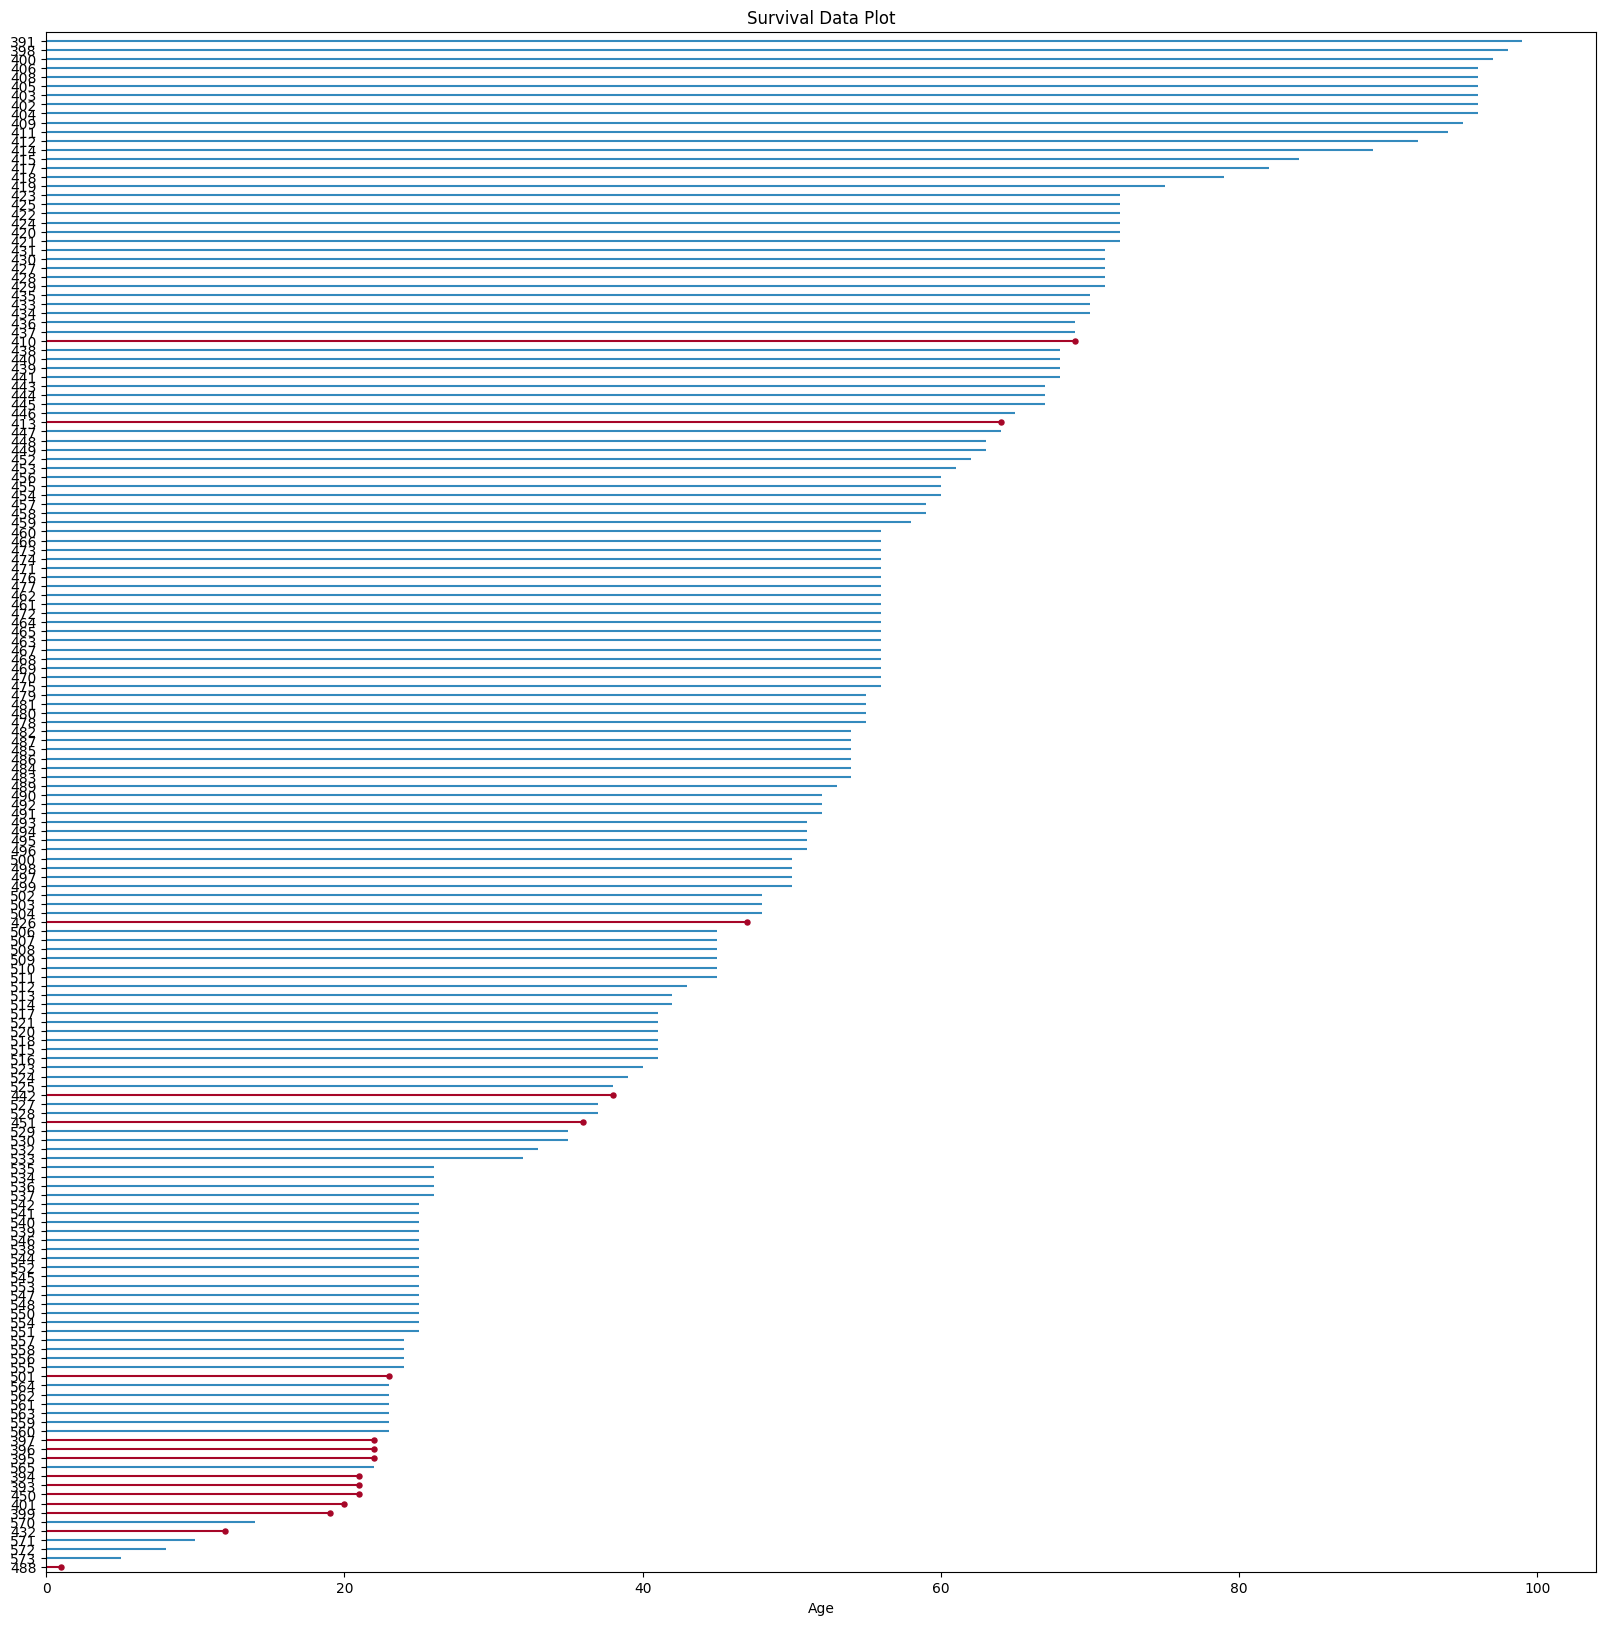

In [12]:
survival_data = table2_sorted[['Society_Polity','age', 'delta', 'formation_bin', 'Political_Type', 'continent', 'formation']].dropna()
from lifelines.plotting import plot_lifetimes
fig, ax = plt.subplots(figsize=(20, 20))
survival_data1 = survival_data[survival_data['formation_bin'] == 'Q4']
ax = plot_lifetimes(survival_data1['age'], event_observed=survival_data1['delta'], label='Survival Data')
ax.set_title('Survival Data Plot')
ax.set_xlabel('Age')

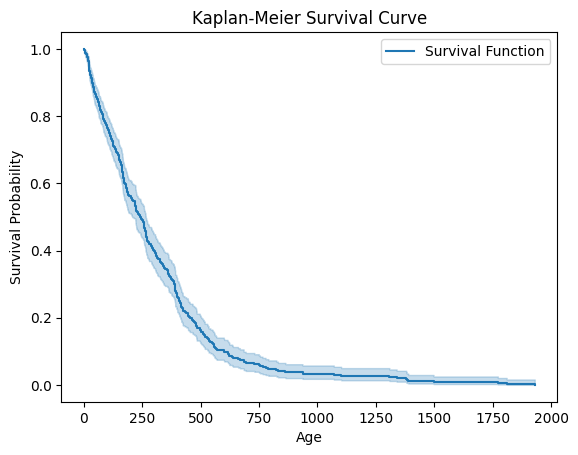

In [13]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(survival_data['age'], event_observed=survival_data['delta'])
kmf.plot(label='Survival Function')
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Age')
plt.ylabel('Survival Probability')
plt.show()

Text(0, 0.5, 'Cumulative Density')

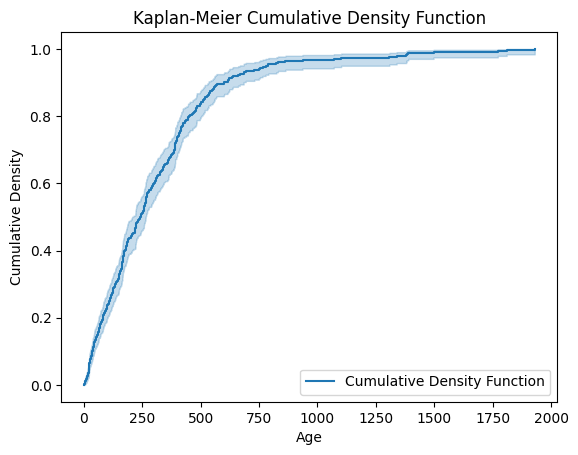

In [14]:
kmf.plot_cumulative_density(label='Cumulative Density Function')
plt.title('Kaplan-Meier Cumulative Density Function')
plt.xlabel('Age')
plt.ylabel('Cumulative Density')


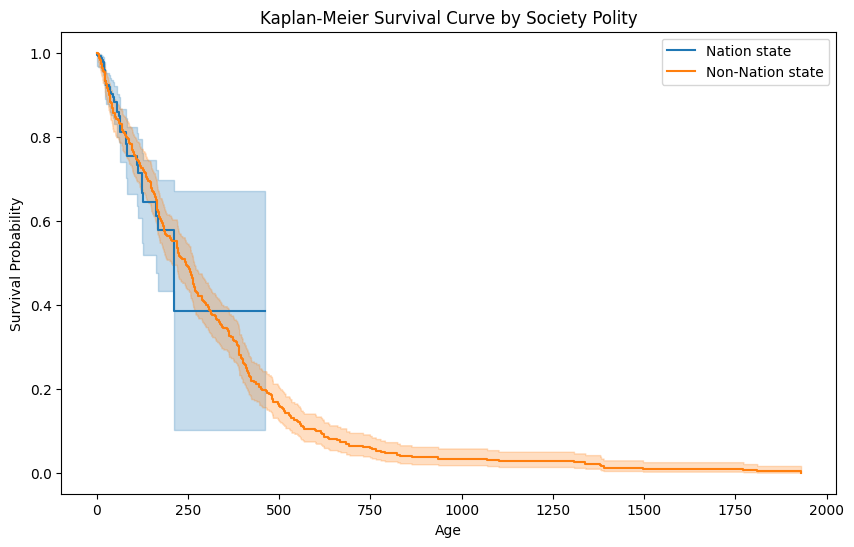

In [15]:
# Ensure 'age' is numeric and drop rows with NaN ages
survival_data['age'] = pd.to_numeric(survival_data['age'], errors='coerce')

nation = (survival_data['Political_Type'] == 'Nation state')
fig, ax = plt.subplots(figsize=(10, 6))
kmf.fit(survival_data[nation]['age'], event_observed=survival_data[nation]['delta'], label='Nation state')
kmf.plot_survival_function(ax=ax)

kmf.fit(survival_data[~nation]['age'], event_observed=survival_data[~nation]['delta'], label='Non-Nation state')
kmf.plot_survival_function(ax=ax)

plt.title('Kaplan-Meier Survival Curve by Society Polity')
plt.xlabel('Age')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()

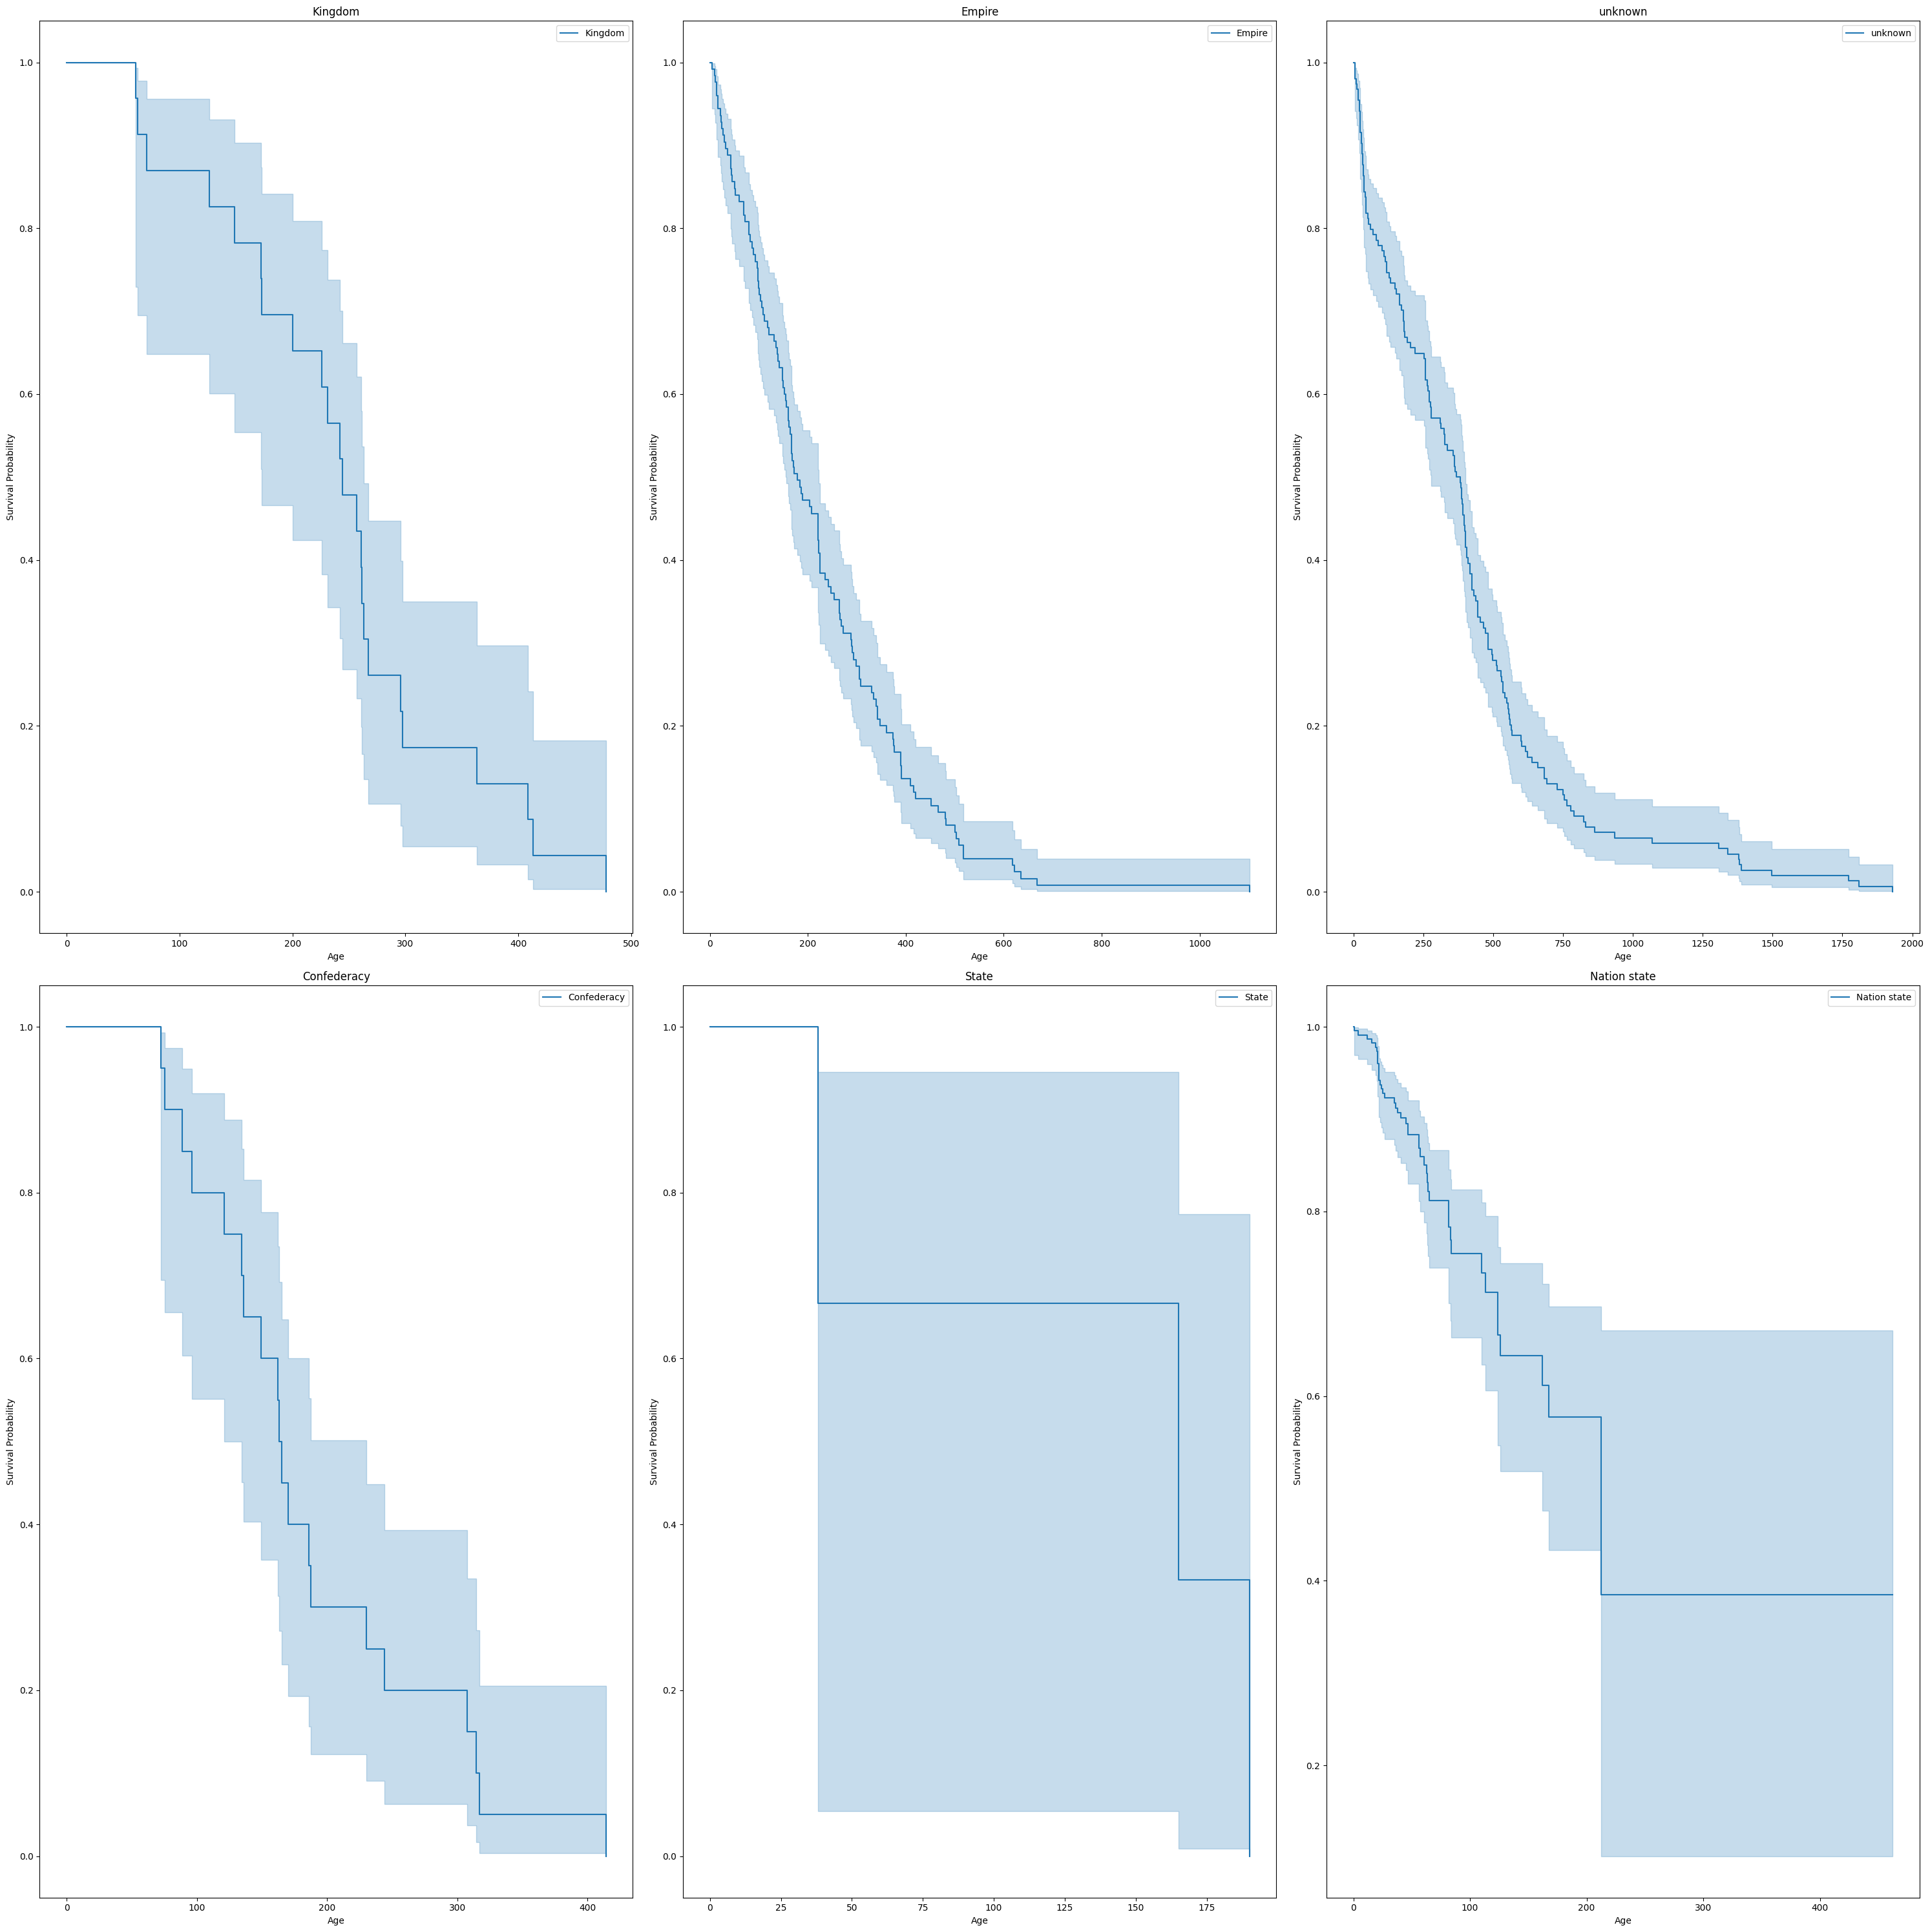

In [40]:
state_type = survival_data['Political_Type'].unique()
fig, axs = plt.subplots(2, 3, figsize=(30, 30))
axs_flat = axs.flatten()

for i, state in enumerate(state_type):
    kmf = KaplanMeierFitter()
    kmf.fit(
        survival_data[survival_data['Political_Type'] == state]['age'],
        event_observed=survival_data[survival_data['Political_Type'] == state]['delta'],
        label=state
    )
    kmf.plot_survival_function(ax=axs_flat[i])
    axs_flat[i].set_title(f'{state}')
    axs_flat[i].set_xlabel('Age')
    axs_flat[i].set_ylabel('Survival Probability')
    axs_flat[i].legend()

plt.tight_layout()
plt.show()

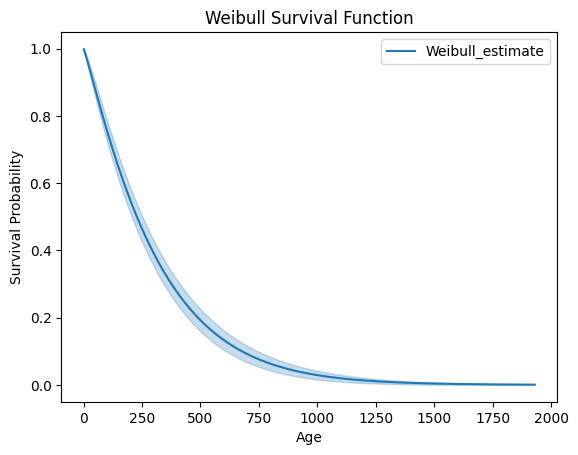

In [17]:
from lifelines import WeibullFitter, WeibullAFTFitter
wf = WeibullFitter()
wf.fit(survival_data['age'], event_observed=survival_data['delta'])
wf.plot_survival_function()
plt.title('Weibull Survival Function')
plt.xlabel('Age')
plt.ylabel('Survival Probability')
plt.show()

Text(0, 0.5, 'Cumulative Density')

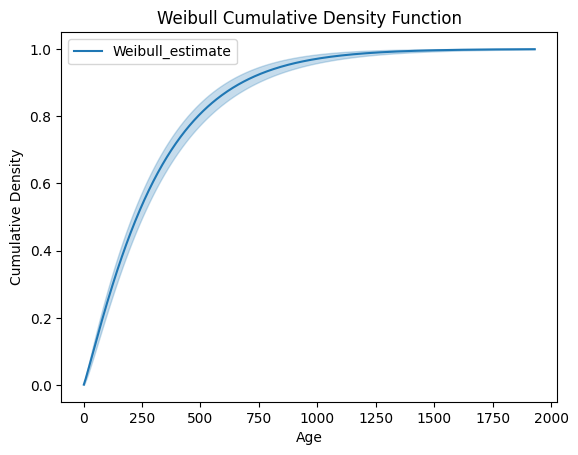

In [18]:
wf.plot_cumulative_density()
plt.title('Weibull Cumulative Density Function')
plt.xlabel('Age')
plt.ylabel('Cumulative Density')


In [19]:
survival_data.head()

,Society_Polity,age,delta,formation_bin,Political_Type,continent,formation
0,Egyptian Dynasties I and II,413.0,1,Q1,Kingdom,Africa,-3100.0
1,Old Egytpian Kingdom,466.0,1,Q1,Empire,Africa,-2621.0
672,Guo,1930.0,1,Q1,unknown,Asia,-2600.0
2,The Akkadian Empire (Sumer),186.0,1,Q1,Empire,Asia,-2334.0
3,Ur III Dynasty (Neo-Sumerian Empire),108.0,1,Q1,Empire,Asia,-2112.0


<lifelines.WeibullAFTFitter: fitted with 552 total observations, 183 right-censored observations>
             duration col = 'age'
                event col = 'delta'
   number of observations = 552
number of events observed = 369
           log-likelihood = -2462.88
         time fit was run = 2025-06-11 23:42:47 UTC

---
                       coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param   covariate                                                                                                      
lambda_ Intercept      6.26    523.75      0.10            6.07            6.45              434.40              631.48
        formation_age -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
rho_    Intercept      0.12      1.13      0.04            0.05            0.20                1.05                1.22

                       cmp to     z      p  -log2(p)
param   covariate                                   
lambda_ Intercept        0.00 65.60 <0.005       inf
        formation_age    0.00 -6.50 <0.005     33.52
rho_    Intercept        0.00  3.24 <0.005      9.70
---
Concordance = 0.60
AIC = 4931.76
log-likelihood ratio test = 45.00 on 1 df
-log2(p) of ll-ratio test = 35.56

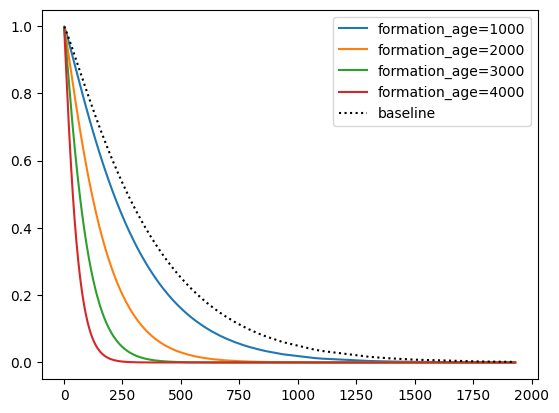

In [20]:
from lifelines import WeibullAFTFitter
import numpy as np
survival_data_cleaned = survival_data.drop(columns=['Society_Polity', 'formation_bin', 'Political_Type', 'continent']).dropna()

# Add a log_formation column for modeling
survival_data_cleaned['formation_age'] = 2016 - survival_data_cleaned['formation'].abs()
# Drop rows with NaN in log_formation (if any)

waf = WeibullAFTFitter()
waf.fit(survival_data_cleaned, duration_col='age', event_col='delta', formula="formation_age")
waf.print_summary()
waf.plot_partial_effects_on_outcome(covariates='formation_age', values=[1000, 2000, 3000, 4000])
plt.show() 

<lifelines.CoxPHFitter: fitted with 552 total observations, 183 right-censored observations>
             duration col = 'age'
                event col = 'delta'
      baseline estimation = breslow
   number of observations = 552
number of events observed = 369
   partial log-likelihood = -1792.06
         time fit was run = 2025-06-11 23:44:24 UTC

---
               coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                      
formation      0.00      1.00      0.00            0.00            0.00                1.00                1.00
formation_age  0.00      1.00      0.00            0.00            0.00                1.00                1.00

               cmp to    z      p  -log2(p)
covariate                                  
formation        0.00 9.43 <0.005     67.72
formation_age    0.00 7.57 <0.005     44.62
---
Concordance = 0.71
Partial AIC = 3588.12
log-likelihood ratio test = 133.66 on 2 df
-log2(p) of ll-ratio test = 96.42

<Axes: xlabel='log(HR) (95% CI)'>

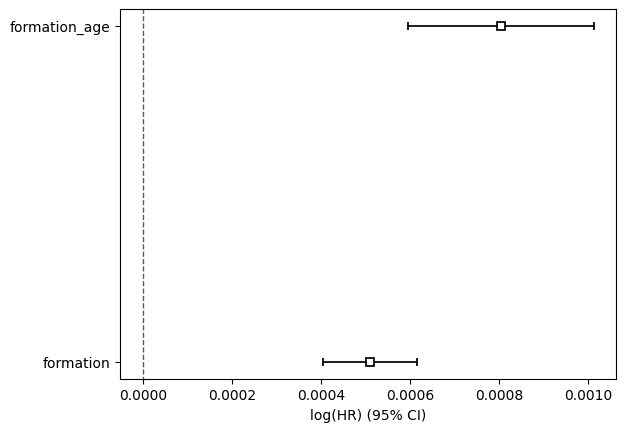

In [24]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()
# Fit the model using the cleaned survival data with 'formation_age'
cph.fit(survival_data_cleaned, duration_col='age', event_col='delta')
cph.print_summary()
cph.plot()

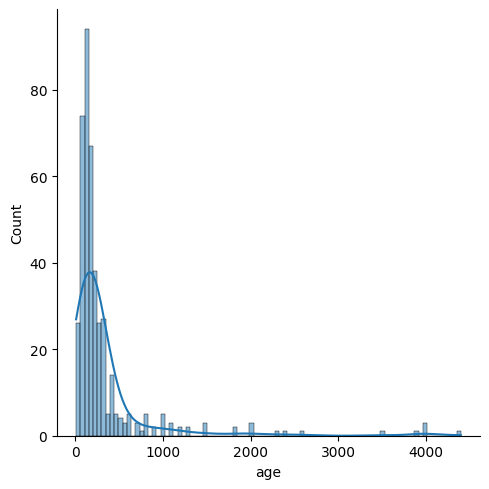

In [25]:
sns.displot(table1['age'], kde=True)

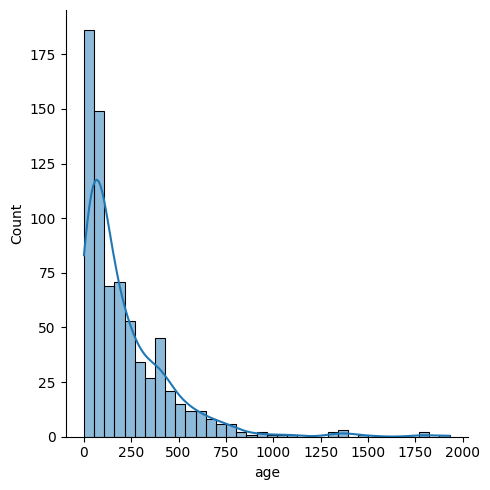

In [26]:
sns.displot(table2['age'], kde=True)

In [27]:
table2.columns.values

array(['Society_Polity', 'State_Formation_low', 'State_Formation_high',
       'formation', 'Adulthood_Date', 'Peak_Power', 'Collapse_low',
       'Collapse_high', 'collapse', 'Approx_age', 'age', 'Political_Type',
       'Political_Sub_Type', 'Region', 'Capital', 'Source',
       'Proximate_Cause', 'Underlying_Cause', 'Collapse_Tra', 'Notes',
       'Relatationship', 'Capital_1', 'lat1', 'continent', 'lon1',
       'Capital_2', 'lat2', 'lon2', 'Capital_3', 'lat3', 'lon3',
       'violience_attractor', 'censored'], dtype=object)

In [28]:
table2['Proximate_Cause'] = table2['Proximate_Cause'].astype(str)
table2['Underlying_Cause'] = table2['Underlying_Cause'].astype(str)
table2['cause'] = table2[['Proximate_Cause', 'Underlying_Cause']].agg(' '.join, axis=1)

In [29]:
table2['cause'] = table2['cause'].str.replace('nan', ' ').str.strip()

In [30]:
import geopandas as gpd
from shapely.geometry import Point
def create_geodataframe(df, lat_col, lon_col):
    geometry = [Point(xy) for xy in zip(df[lon_col], df[lat_col])]
    gdf = gpd.GeoDataFrame(df, geometry=geometry)
    return gdf

In [31]:
gdf  = create_geodataframe(table2, 'lat1', 'lon1')

In [32]:
import folium
import branca
def create_map(gdf, zoom_start=6):
    # Filter out rows with valid lat1 and lon1
    gdf_valid = gdf.dropna(subset=['lat1', 'lon1'])
    # Remove rows where lat1 or lon1 is zero (invalid coordinates)
    gdf_valid = gdf_valid[(gdf_valid['lat1'] != 0) & (gdf_valid['lon1'] != 0)]
    if gdf_valid.empty:
        raise ValueError("No valid coordinates to plot on the map.")
    colormap = branca.colormap.linear.YlOrRd_09.scale(gdf_valid['age'].min(), gdf_valid['age'].max())
    m = folium.Map(location=[gdf_valid['lat1'].mean(), gdf_valid['lon1'].mean()], zoom_start=zoom_start)
    for _, row in gdf_valid.iterrows():
        folium.CircleMarker(
            location=[row['lat1'], row['lon1']],
            radius=5,
            color='black',
            fill=True,
            fill_color=colormap(row['age']),
            fill_opacity=0.7,
            popup=folium.Popup(
                f"Name: {row['Society_Polity']}<br>"
                f"Cause: {row['cause']}<br>"
                f"Age: {row['age']}<br>"
                f"Political Type: {row['Political_Type']}<br>"
                f"Political Subtype: {row['Political_Sub_Type']}",
                max_height=150,
                max_width=300
            ),
            tooltip=f"Name: {row['Society_Polity']}<br>Age: {row['age']}"
        ).add_to(m)
    colormap.caption = 'Age'
    colormap.add_to(m)
    return m
m = create_map(gdf)
m

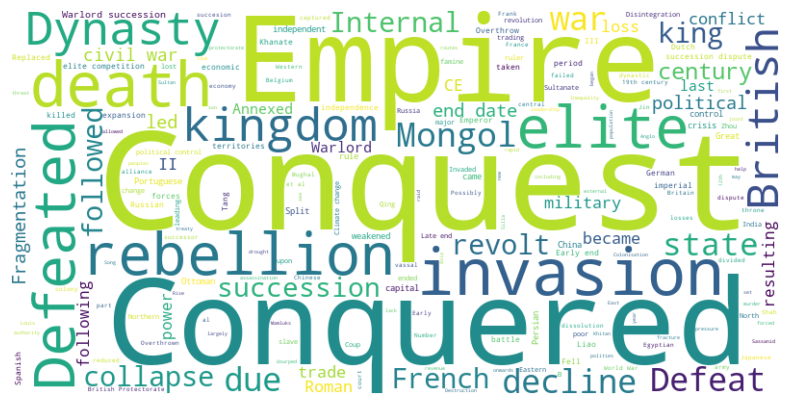

In [33]:
import wordcloud
def create_wordcloud(text, width=800, height=400):
    wordcloud_obj = wordcloud.WordCloud(width=width, height=height, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_obj, interpolation='bilinear')
    plt.axis('off')
    plt.show()
text = ' '.join(table2['cause'].dropna())
create_wordcloud(text)

In [35]:
import spacy
import nltk
from nltk.corpus import stopwords as nltk_stopwords
nltk.download('stopwords')
nlp = spacy.load("en_core_web_sm")
stop_words = set(nltk_stopwords.words('english'))
def preprocess(texts):
    processed_texts = []

    for doc in nlp.pipe(texts, batch_size=1000):
        tokens = [token.lemma_.lower() for token in doc
                  if token.is_alpha and
                     token.lemma_.lower() not in stop_words and
                     len(token) > 2]
        processed_texts.append(tokens)

    return processed_texts


[nltk_data] Downloading package stopwords to /Users/wiley/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
from gensim import corpora, models
text = preprocess(table2['cause'].dropna().tolist())
dictionary = corpora.Dictionary(text)
corpus = [dictionary.doc2bow(doc) for doc in text]
lda_model = models.LdaModel(
    corpus,
    num_topics=5,
    id2word=dictionary,
    passes=10,
    random_state=42
)
lda_model.print_topics()

[(0,
  '0.014*"british" + 0.014*"conquer" + 0.013*"elite" + 0.010*"change" + 0.009*"rebellion" + 0.009*"war" + 0.008*"french" + 0.007*"succession" + 0.006*"loss" + 0.006*"control"'),
 (1,
  '0.013*"war" + 0.010*"empire" + 0.010*"dynasty" + 0.010*"force" + 0.009*"political" + 0.007*"control" + 0.007*"defeat" + 0.007*"succession" + 0.007*"military" + 0.006*"internal"'),
 (2,
  '0.023*"conquest" + 0.018*"end" + 0.011*"kingdom" + 0.010*"invasion" + 0.010*"date" + 0.009*"conquer" + 0.009*"due" + 0.009*"century" + 0.009*"death" + 0.009*"french"'),
 (3,
  '0.032*"conquest" + 0.019*"warlord" + 0.019*"empire" + 0.018*"succession" + 0.011*"elite" + 0.010*"mongol" + 0.010*"invasion" + 0.008*"take" + 0.008*"conquer" + 0.008*"result"'),
 (4,
  '0.030*"defeat" + 0.015*"conquer" + 0.013*"empire" + 0.013*"fragmentation" + 0.012*"death" + 0.009*"follow" + 0.008*"war" + 0.008*"lead" + 0.008*"kingdom" + 0.007*"elite"')]

In [37]:
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

def find_optimal_k(dictionary, corpus, texts, k_range):
    from gensim.models import LdaModel

    coherence_scores = []
    for k in k_range:
        lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, random_state=42)
        coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        score = coherence_model.get_coherence()
        coherence_scores.append(score)
        print(f"Topics: {k}, Coherence: {score:.4f}")
    
    # Plot
    plt.plot(k_range, coherence_scores)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence Score (c_v)")
    plt.title("Optimal Topic Count")
    plt.show()
    
    return coherence_scores

Topics: 2, Coherence: 0.2962
Topics: 3, Coherence: 0.3418
Topics: 4, Coherence: 0.2961
Topics: 5, Coherence: 0.3169
Topics: 6, Coherence: 0.3168
Topics: 7, Coherence: 0.3432
Topics: 8, Coherence: 0.3497
Topics: 9, Coherence: 0.3597
Topics: 10, Coherence: 0.3678
Topics: 11, Coherence: 0.3389
Topics: 12, Coherence: 0.3628
Topics: 13, Coherence: 0.3711
Topics: 14, Coherence: 0.3582
Topics: 15, Coherence: 0.3661
Topics: 16, Coherence: 0.3465
Topics: 17, Coherence: 0.3672
Topics: 18, Coherence: 0.3566
Topics: 19, Coherence: 0.3523


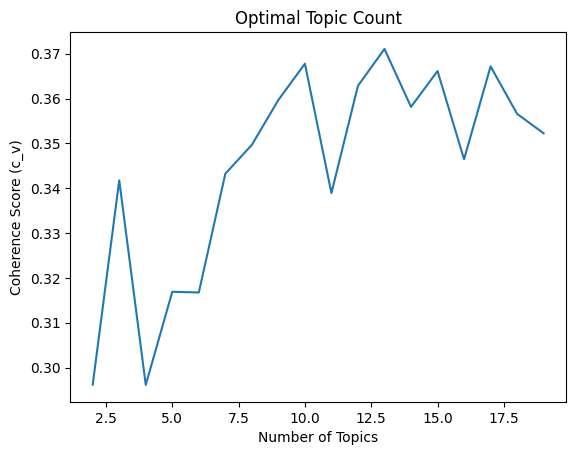

[0.29619829135452835,
 0.34175912010545156,
 0.29613948173736987,
 0.3169140901173072,
 0.3167558217964191,
 0.3432428137209743,
 0.3496858930635957,
 0.35969197200290004,
 0.3677772240260893,
 0.3389353906585364,
 0.36284530279464405,
 0.3710788041573028,
 0.35815244699478377,
 0.3661431571355419,
 0.3464689239275926,
 0.3671751071430976,
 0.35660569539929277,
 0.3522596007209042]

In [39]:
find_optimal_k(dictionary, corpus, text, range(2, 20))

In [45]:
lda  = models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=10,
    random_state=42
)

In [46]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
def visualize_topics(lda_model, corpus, dictionary):
    vis = gensimvis.prepare(lda_model, corpus, dictionary)
    return vis
vis = visualize_topics(lda, corpus, dictionary)
pyLDAvis.display(vis)